In [1]:
%load_ext autoreload
%autoreload 2

import tqdm
import _set_path
from pbpi.algo_core.training import evaluations_per_config

In [2]:
ALGO_TYPE = {'original': {'name': 'original', 'exploration': False}
            ,'modified': {'name': 'modified', 'exploration': True} }

### Fixed patient population (fixed random-seed)

#### Original algorithm

In [3]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [4]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 51


Currently evaluated configs:
 Samples: 1000 | Actions: 4 | Roll-outs: 10 | Significance: 0.1

Evaluation 200 patient generation seed is: 51



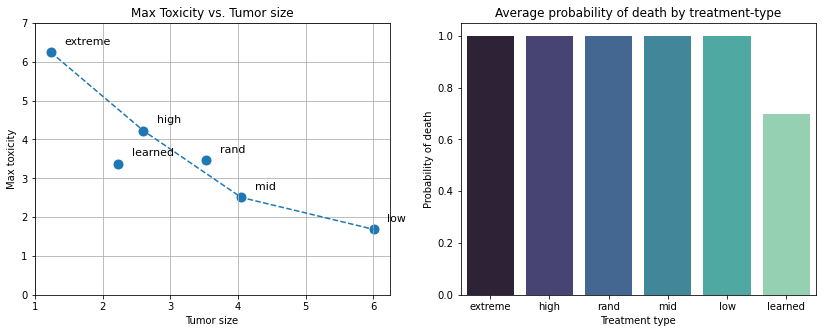


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : [2.22673908]
                         - Avg. max. toxicity : [3.37062139]
                         - Avg. prob. of death : [0.69773266]


Evaluation 200 patient generation seed is: 51



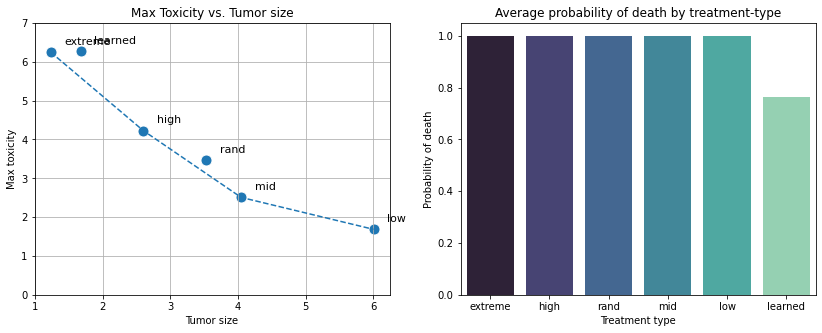


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : [1.6722428]
                         - Avg. max. toxicity : [6.26782647]
                         - Avg. prob. of death : [0.76301514]


Evaluation 200 patient generation seed is: 51



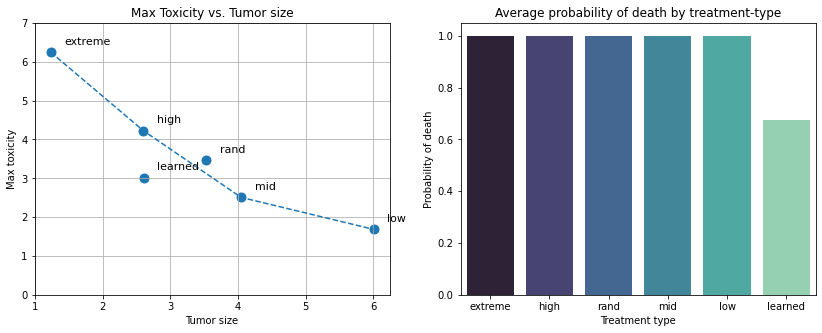


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : [2.60755657]
                         - Avg. max. toxicity : [3.01885982]
                         - Avg. prob. of death : [0.67611598]


Evaluation 200 patient generation seed is: 51



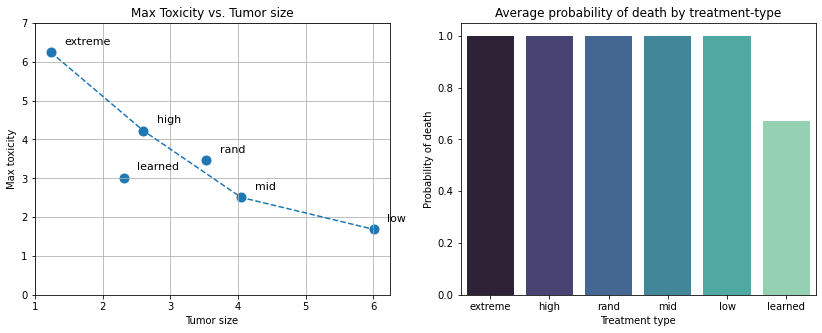


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : [2.31225441]
                         - Avg. max. toxicity : [3.01993972]
                         - Avg. prob. of death : [0.67232278]


Evaluation 200 patient generation seed is: 51



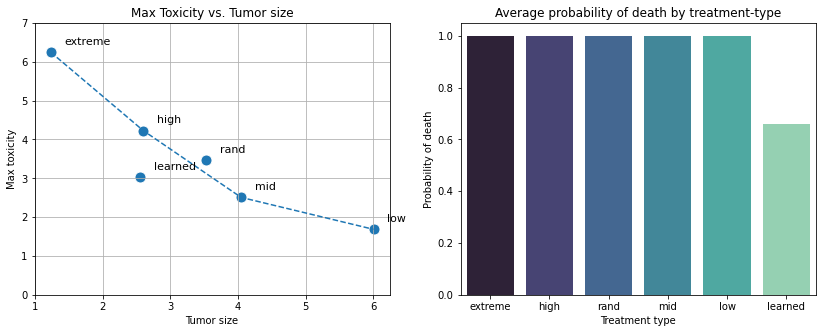


Policy Iteration: 5 - Evaluation results:
                         - Avg. ending tumor size : [2.55794631]
                         - Avg. max. toxicity : [3.02176847]
                         - Avg. prob. of death : [0.65997002]


Evaluation 200 patient generation seed is: 51



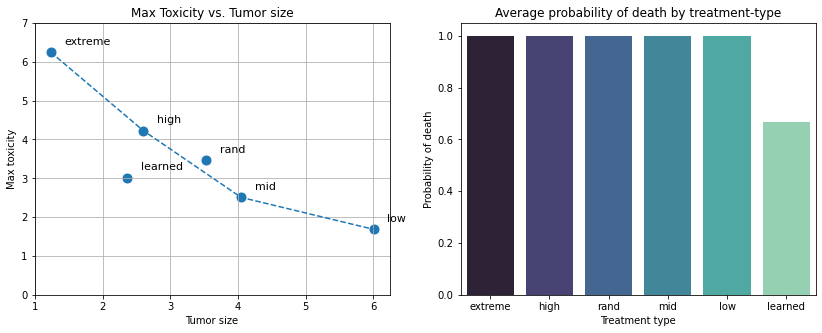


Policy Iteration: 6 - Evaluation results:
                         - Avg. ending tumor size : [2.36004446]
                         - Avg. max. toxicity : [3.01952783]
                         - Avg. prob. of death : [0.66738652]


Evaluation 200 patient generation seed is: 51



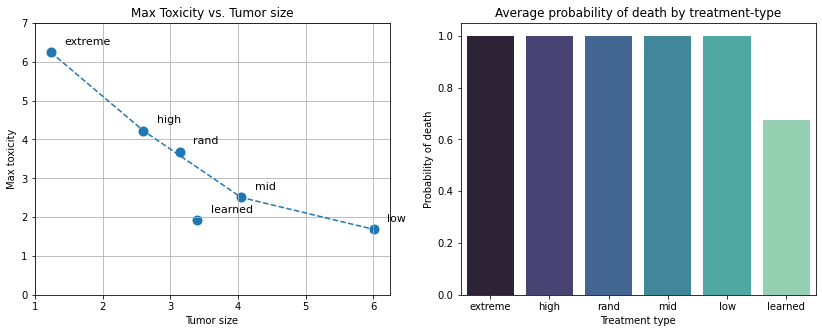


Policy Iteration: 7 - Evaluation results:
                         - Avg. ending tumor size : [3.39504042]
                         - Avg. max. toxicity : [1.91699177]
                         - Avg. prob. of death : [0.67621049]


Evaluation 200 patient generation seed is: 51



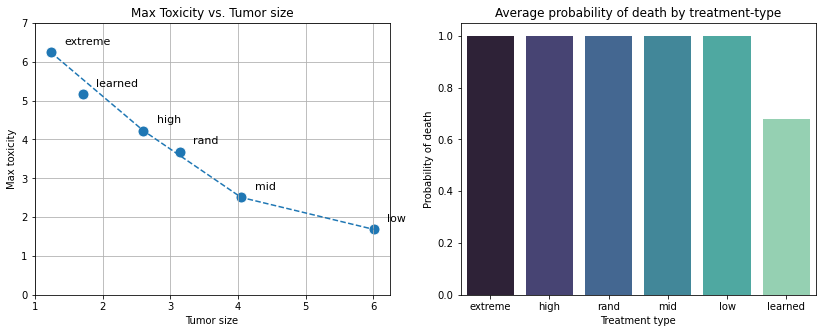


Policy Iteration: 8 - Evaluation results:
                         - Avg. ending tumor size : [1.7053441]
                         - Avg. max. toxicity : [5.16673753]
                         - Avg. prob. of death : [0.67838444]


Evaluation 200 patient generation seed is: 51



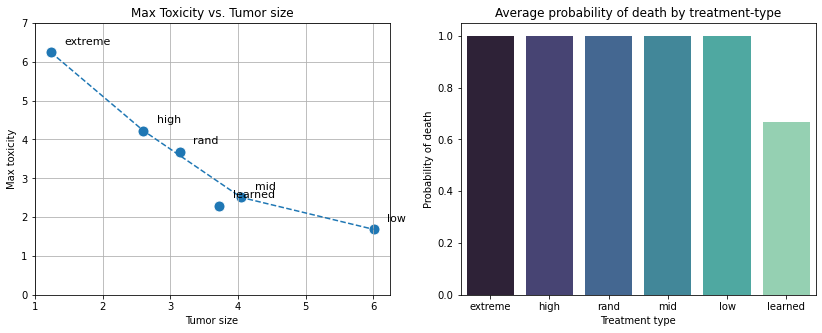


Policy Iteration: 9 - Evaluation results:
                         - Avg. ending tumor size : [3.72455781]
                         - Avg. max. toxicity : [2.29635186]
                         - Avg. prob. of death : [0.66835711]


Evaluation 200 patient generation seed is: 51



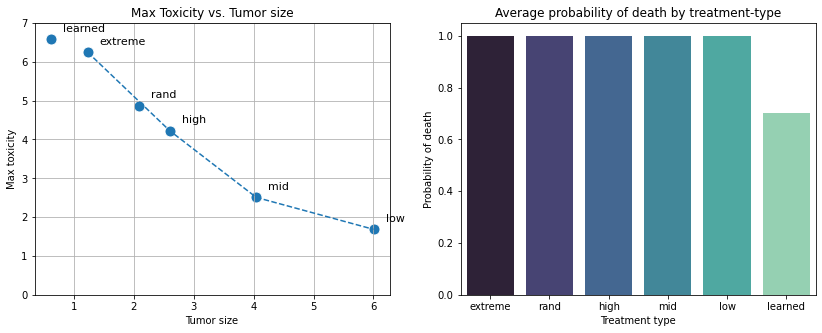


Evaluations: 100%|██████████| 1/1 [1:28:38<00:00, 5318.44s/it]
Policy Iteration: 10 - Evaluation results:
                         - Avg. ending tumor size : [0.61656093]
                         - Avg. max. toxicity : [6.57599773]
                         - Avg. prob. of death : [0.70136861]




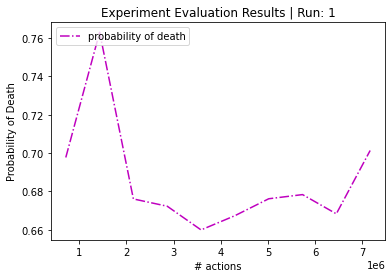

In [4]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size          = sample_size
                                                #, init_state_path       = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions      = configs['Actions'][0]
                                                , max_n_rollouts = rollout_max
                                                , sig_lvl        = sig_lvl

                                                , max_policy_iter_per_run = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config         = 1 # Number of experiments per one parameter config

                                                , eval_runs_per_state     = 1 # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show SR vs. action no. plot of exp. run
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

#### Modified algorithm

In [5]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [4]
          , 'Roll-outs': [10]
          , 'Significance' : [0.01]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 51


Currently evaluated configs:
 Samples: 1000 | Actions: 4 | Roll-outs: 10 | Significance: 0.01

Evaluation 200 patient generation seed is: 51



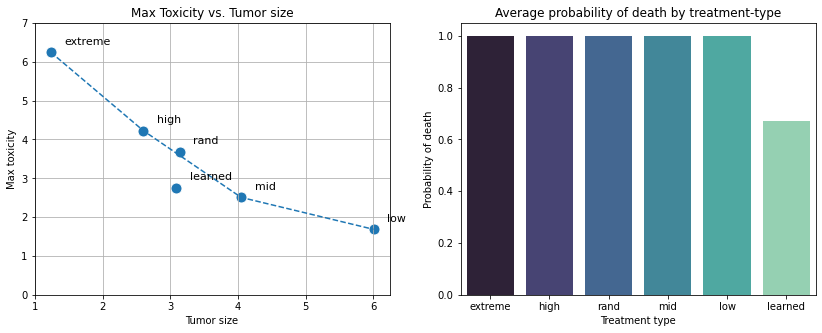


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : [3.08767891]
                         - Avg. max. toxicity : [2.75400583]
                         - Avg. prob. of death : [0.67247865]


Evaluation 200 patient generation seed is: 51



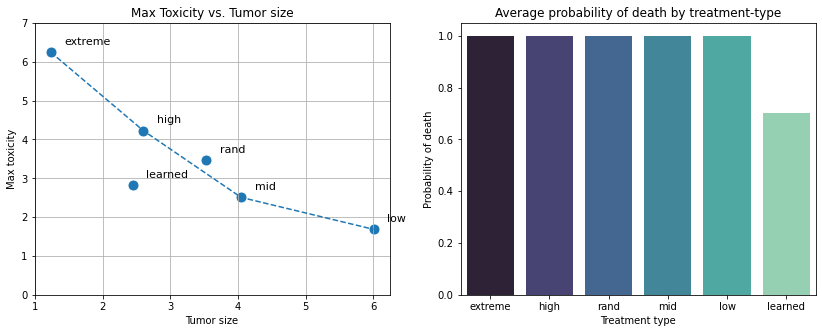


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : [2.44490449]
                         - Avg. max. toxicity : [2.8161191]
                         - Avg. prob. of death : [0.7014045]


Evaluation 200 patient generation seed is: 51



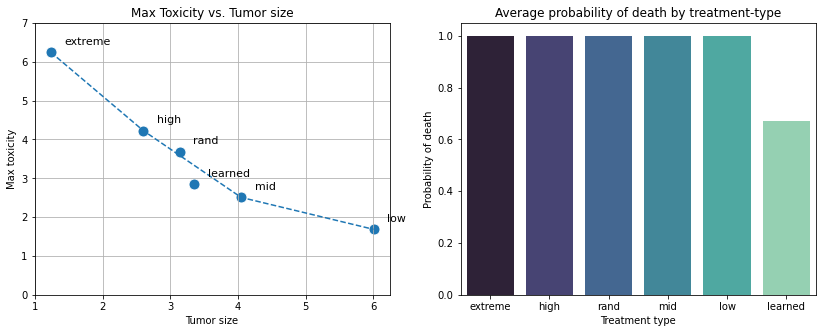


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : [3.35328747]
                         - Avg. max. toxicity : [2.85133606]
                         - Avg. prob. of death : [0.67004308]


Evaluation 200 patient generation seed is: 51



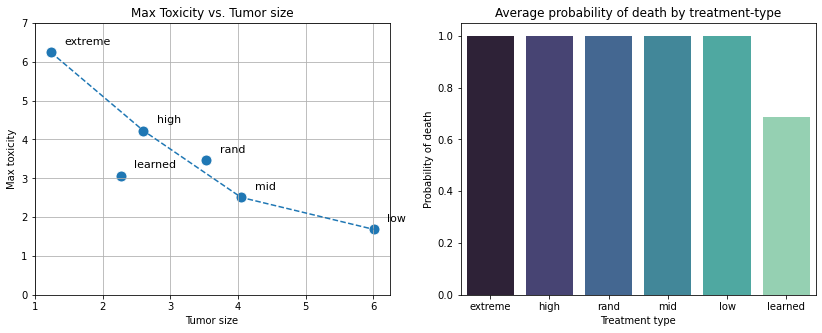


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : [2.26375123]
                         - Avg. max. toxicity : [3.06064508]
                         - Avg. prob. of death : [0.68567356]


Evaluation 200 patient generation seed is: 51



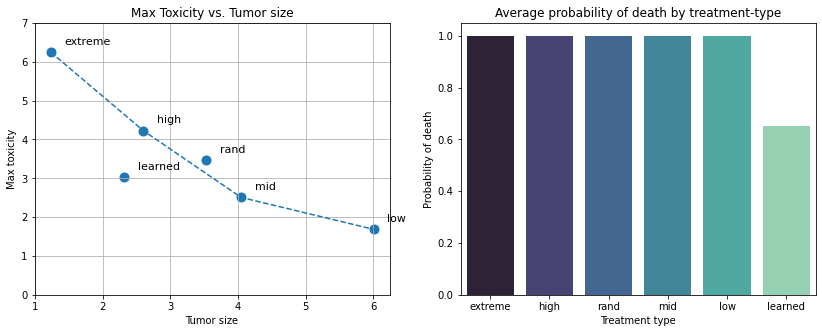


Policy Iteration: 5 - Evaluation results:
                         - Avg. ending tumor size : [2.32036906]
                         - Avg. max. toxicity : [3.03109264]
                         - Avg. prob. of death : [0.6505338]


Evaluation 200 patient generation seed is: 51



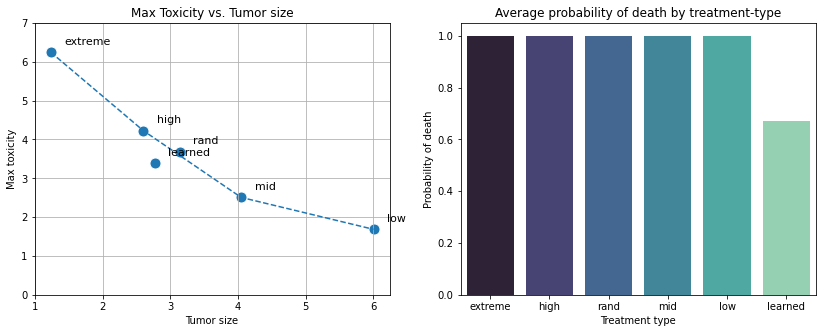


Policy Iteration: 6 - Evaluation results:
                         - Avg. ending tumor size : [2.76776907]
                         - Avg. max. toxicity : [3.38617762]
                         - Avg. prob. of death : [0.66984416]


Evaluation 200 patient generation seed is: 51



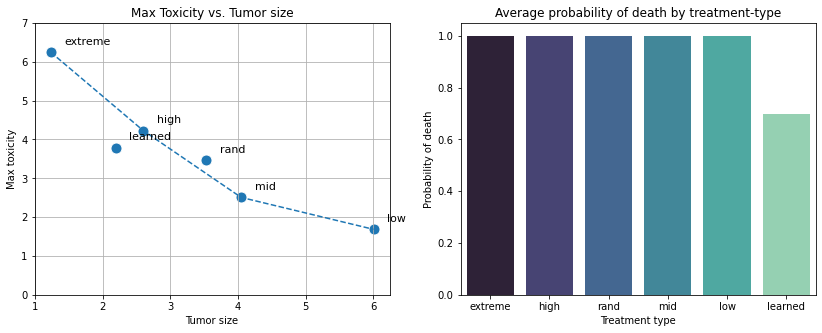


Policy Iteration: 7 - Evaluation results:
                         - Avg. ending tumor size : [2.1906909]
                         - Avg. max. toxicity : [3.7930484]
                         - Avg. prob. of death : [0.69719535]


Evaluation 200 patient generation seed is: 51



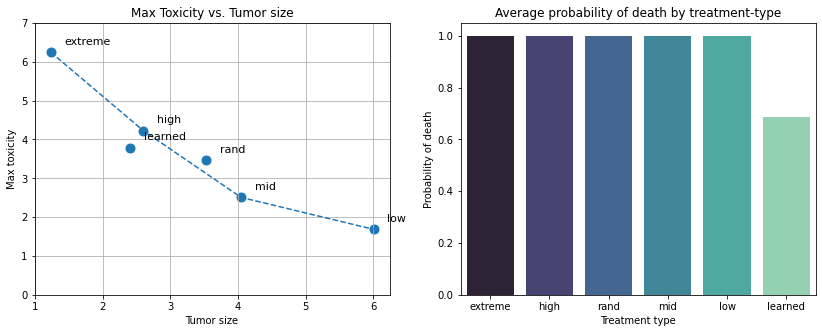


Policy Iteration: 8 - Evaluation results:
                         - Avg. ending tumor size : [2.40547563]
                         - Avg. max. toxicity : [3.78780789]
                         - Avg. prob. of death : [0.6858946]


Evaluation 200 patient generation seed is: 51



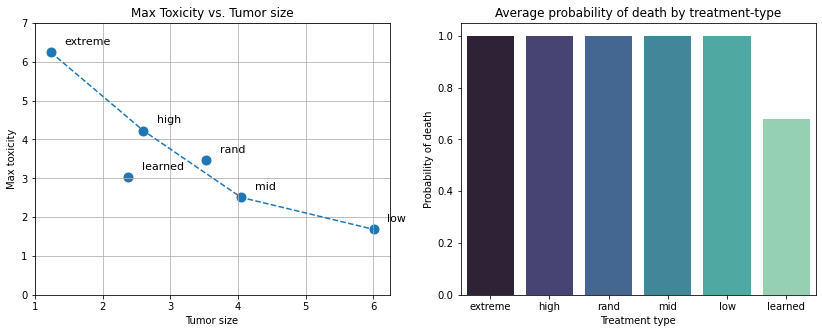


Policy Iteration: 9 - Evaluation results:
                         - Avg. ending tumor size : [2.37761022]
                         - Avg. max. toxicity : [3.0226994]
                         - Avg. prob. of death : [0.68075437]


Evaluation 200 patient generation seed is: 51



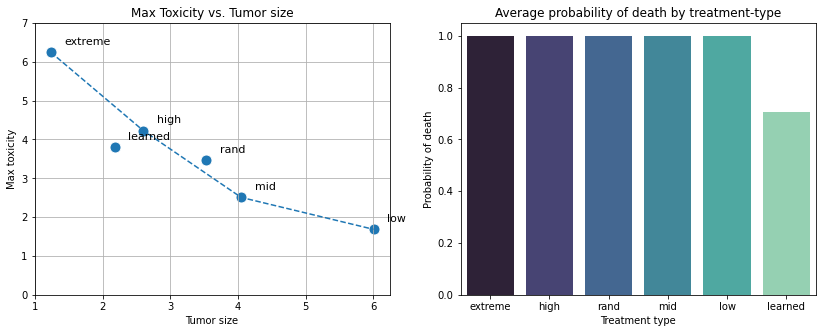


Evaluations: 100%|██████████| 1/1 [1:05:21<00:00, 3921.90s/it]
Policy Iteration: 10 - Evaluation results:
                         - Avg. ending tumor size : [2.17903243]
                         - Avg. max. toxicity : [3.80181312]
                         - Avg. prob. of death : [0.70461317]




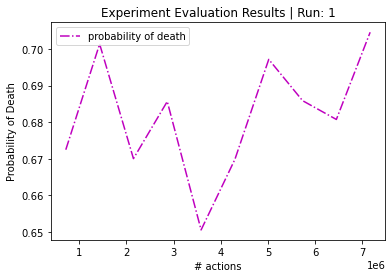

In [6]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size          = sample_size
                                                #, init_state_path       = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions      = configs['Actions'][0]
                                                , max_n_rollouts = rollout_max
                                                , sig_lvl        = sig_lvl

                                                , max_policy_iter_per_run = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config         = 1 # Number of experiments per one parameter config

                                                , eval_runs_per_state     = 1 # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show SR vs. action no. plot of exp. run
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

---
### Different patient populations (random seeds)

#### Original algorithm

In [9]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [4]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 38


Currently evaluated configs:
 Samples: 1000 | Actions: 4 | Roll-outs: 10 | Significance: 0.1

Evaluation 200 patient generation seed is: 99



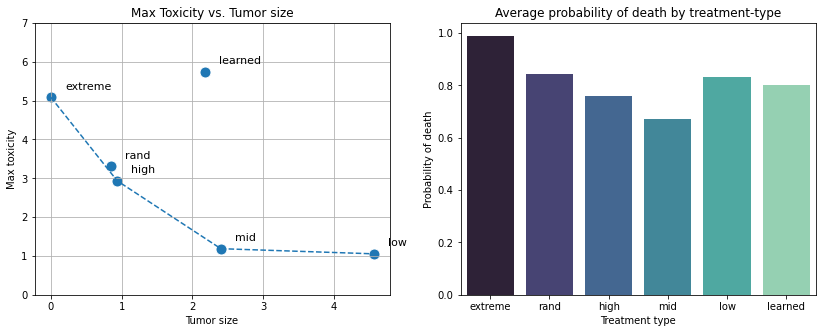


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : [2.17730097]
                         - Avg. max. toxicity : [5.74016489]
                         - Avg. prob. of death : [0.80017065]


Evaluation 200 patient generation seed is: 10



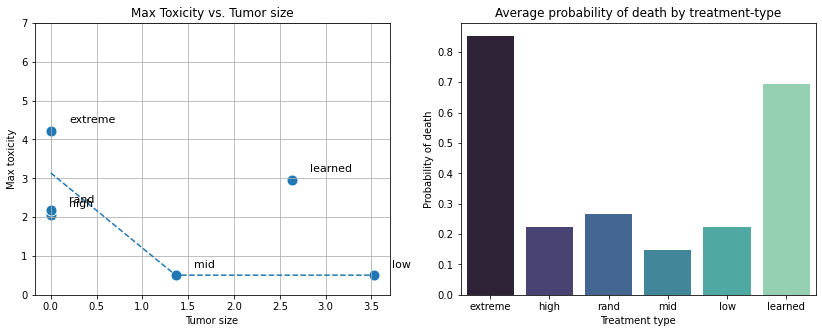


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : [2.62760736]
                         - Avg. max. toxicity : [2.96112724]
                         - Avg. prob. of death : [0.69412702]


Evaluation 200 patient generation seed is: 4



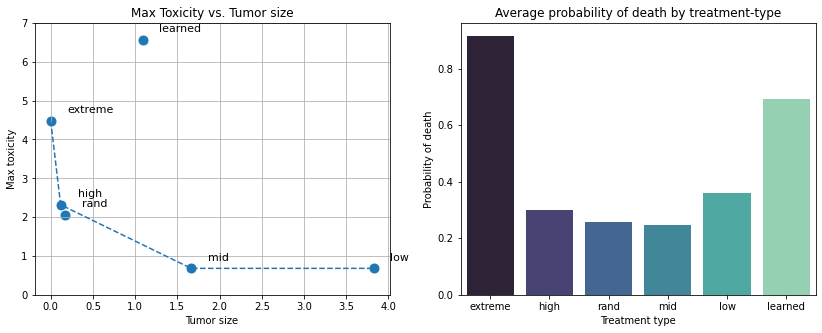


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : [1.08781868]
                         - Avg. max. toxicity : [6.56662855]
                         - Avg. prob. of death : [0.69141491]


Evaluation 200 patient generation seed is: 54



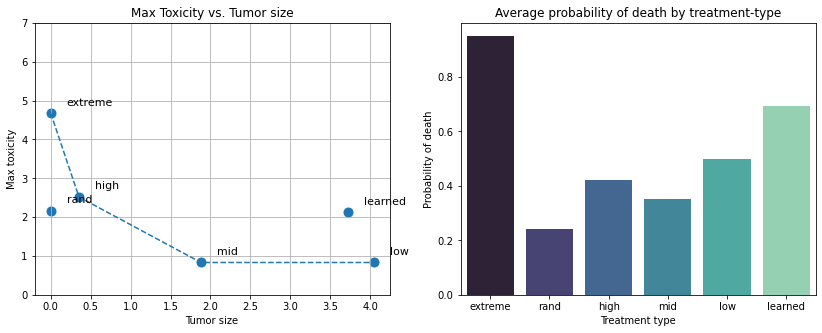


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : [3.72122553]
                         - Avg. max. toxicity : [2.1255838]
                         - Avg. prob. of death : [0.69276634]


Evaluation 200 patient generation seed is: 4



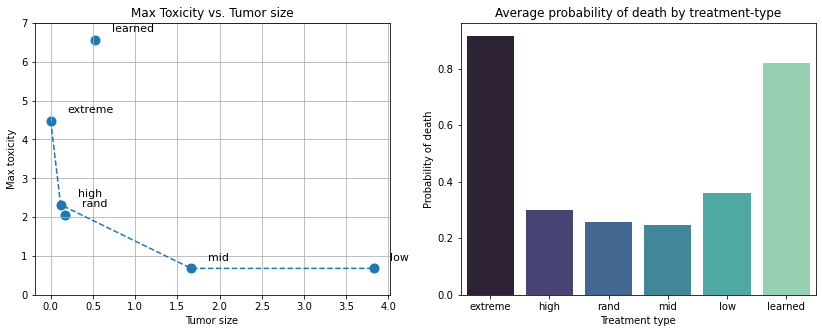


Policy Iteration: 5 - Evaluation results:
                         - Avg. ending tumor size : [0.52814894]
                         - Avg. max. toxicity : [6.57134412]
                         - Avg. prob. of death : [0.81945467]


Evaluation 200 patient generation seed is: 54



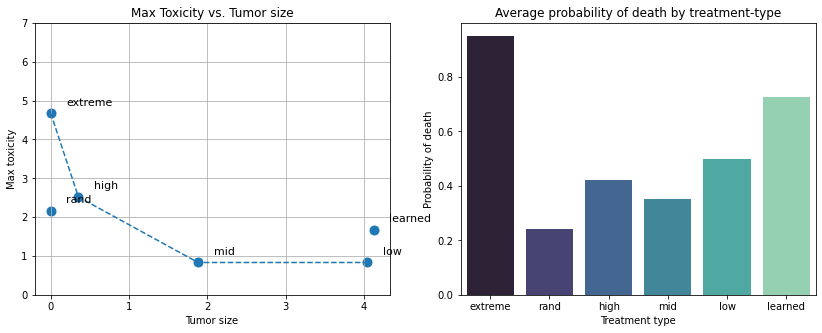


Policy Iteration: 6 - Evaluation results:
                         - Avg. ending tumor size : [4.1211092]
                         - Avg. max. toxicity : [1.66741013]
                         - Avg. prob. of death : [0.72609379]


Evaluation 200 patient generation seed is: 4



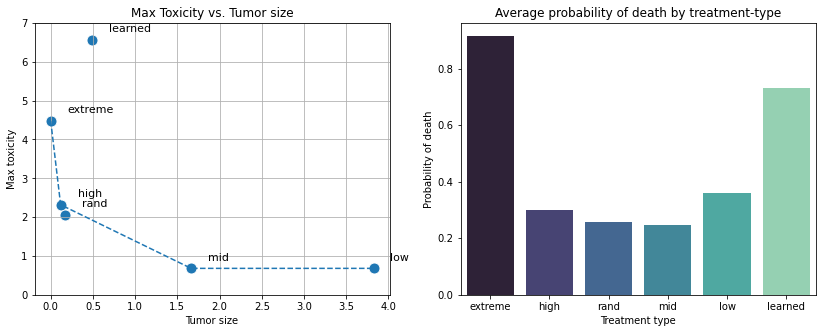


Policy Iteration: 7 - Evaluation results:
                         - Avg. ending tumor size : [0.49145391]
                         - Avg. max. toxicity : [6.57096086]
                         - Avg. prob. of death : [0.73020335]


Evaluation 200 patient generation seed is: 54



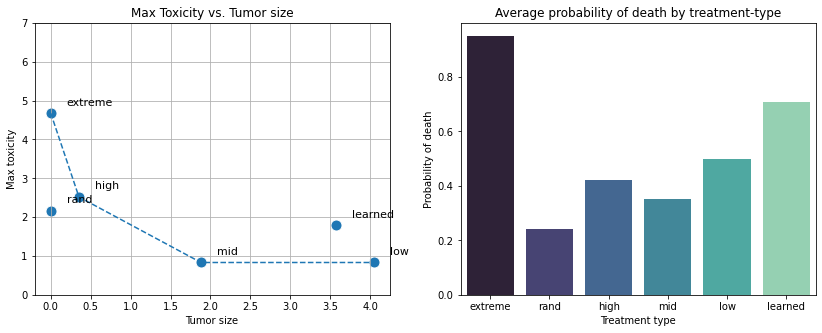


Policy Iteration: 8 - Evaluation results:
                         - Avg. ending tumor size : [3.57468231]
                         - Avg. max. toxicity : [1.78832452]
                         - Avg. prob. of death : [0.70647591]


Evaluation 200 patient generation seed is: 4



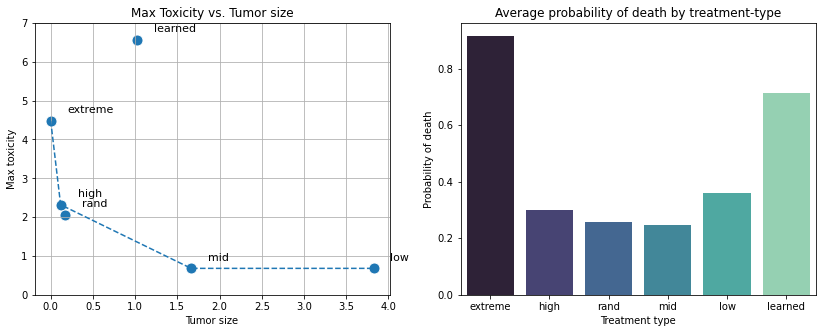


Policy Iteration: 9 - Evaluation results:
                         - Avg. ending tumor size : [1.02360342]
                         - Avg. max. toxicity : [6.57062412]
                         - Avg. prob. of death : [0.71359382]


Evaluation 200 patient generation seed is: 54



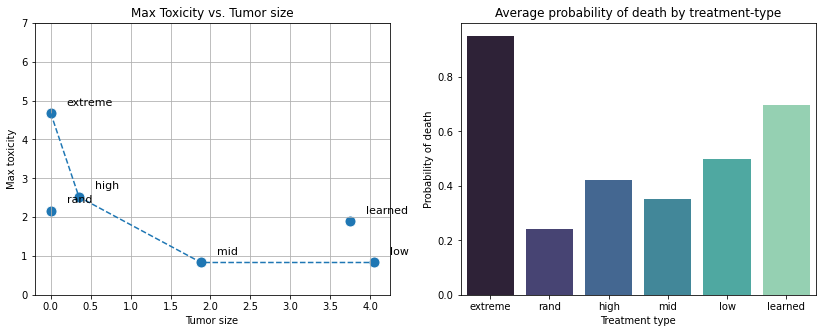


Evaluations: 100%|██████████| 1/1 [2:09:24<00:00, 7764.15s/it]
Policy Iteration: 10 - Evaluation results:
                         - Avg. ending tumor size : [3.75181438]
                         - Avg. max. toxicity : [1.89238944]
                         - Avg. prob. of death : [0.69647177]




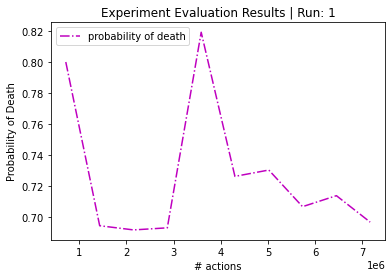

In [10]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size          = sample_size
                                                #, init_state_path       = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions      = configs['Actions'][0]
                                                , max_n_rollouts = rollout_max
                                                , sig_lvl        = sig_lvl

                                                , max_policy_iter_per_run = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config         = 1 # Number of experiments per one parameter config

                                                , eval_runs_per_state     = 1 # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show SR vs. action no. plot of exp. run
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

#### Modified algorithm

In [11]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [4]
          , 'Roll-outs': [10]
          , 'Significance' : [0.01]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 36


Currently evaluated configs:
 Samples: 1000 | Actions: 4 | Roll-outs: 10 | Significance: 0.01

Evaluation 200 patient generation seed is: 41



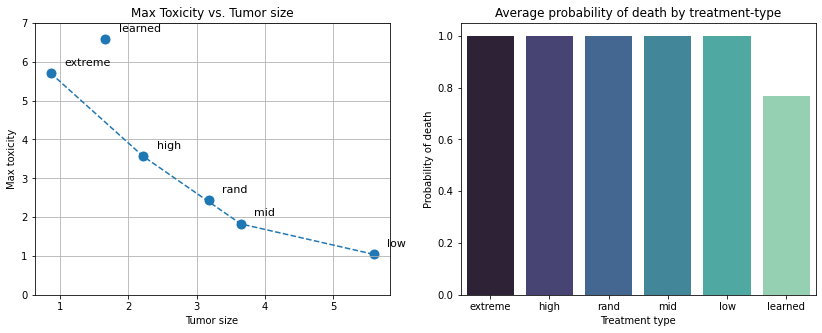


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : [1.657021]
                         - Avg. max. toxicity : [6.58122137]
                         - Avg. prob. of death : [0.76887693]


Evaluation 200 patient generation seed is: 59



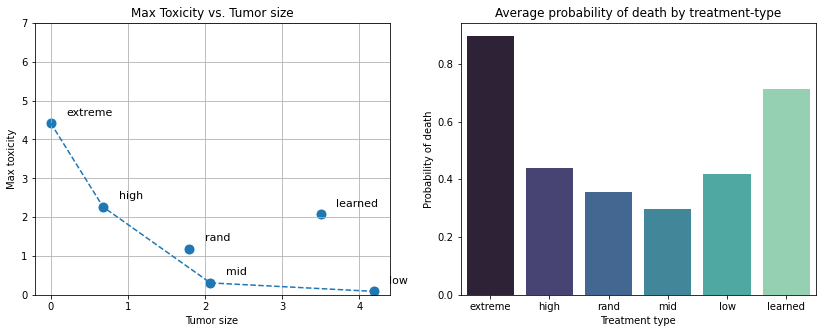


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : [3.50176998]
                         - Avg. max. toxicity : [2.07249392]
                         - Avg. prob. of death : [0.71280838]


Evaluation 200 patient generation seed is: 26



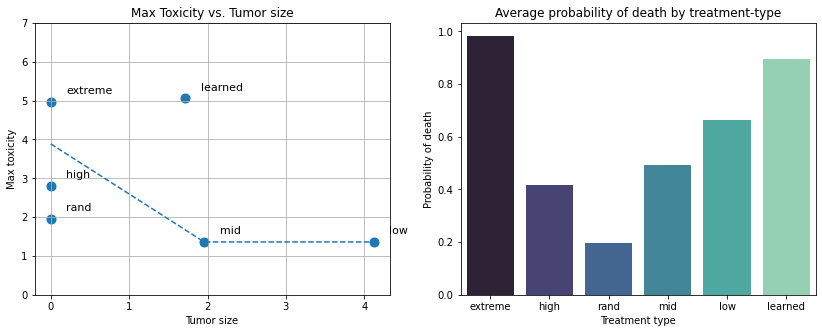


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : [1.71529427]
                         - Avg. max. toxicity : [5.05890212]
                         - Avg. prob. of death : [0.89722724]


Evaluation 200 patient generation seed is: 78



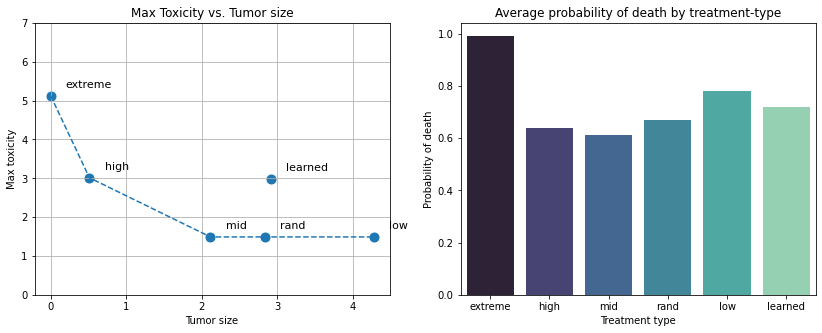


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : [2.91831612]
                         - Avg. max. toxicity : [2.99469555]
                         - Avg. prob. of death : [0.71732842]


Evaluation 200 patient generation seed is: 32



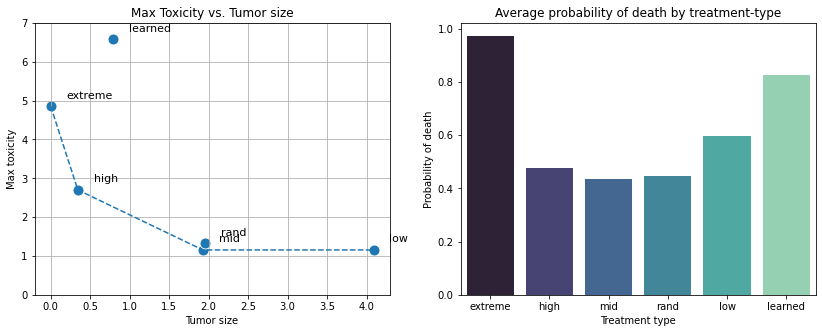


Policy Iteration: 5 - Evaluation results:
                         - Avg. ending tumor size : [0.78813589]
                         - Avg. max. toxicity : [6.58122137]
                         - Avg. prob. of death : [0.82625739]


Evaluation 200 patient generation seed is: 74



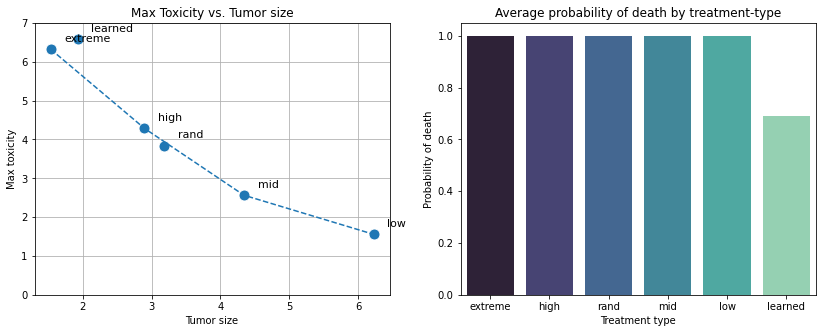


Policy Iteration: 6 - Evaluation results:
                         - Avg. ending tumor size : [1.92141787]
                         - Avg. max. toxicity : [6.58122137]
                         - Avg. prob. of death : [0.69014871]


Evaluation 200 patient generation seed is: 56



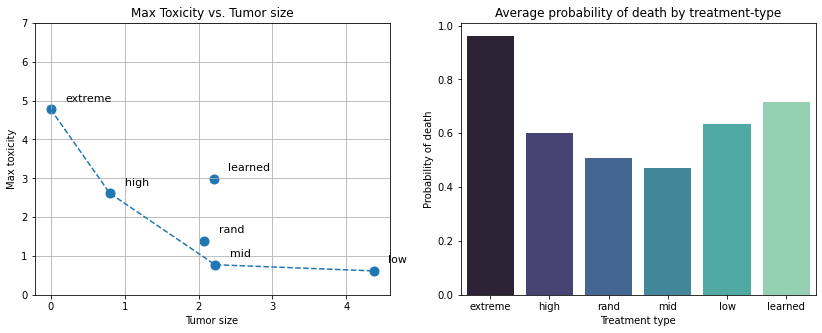


Policy Iteration: 7 - Evaluation results:
                         - Avg. ending tumor size : [2.20437083]
                         - Avg. max. toxicity : [2.99487342]
                         - Avg. prob. of death : [0.71720507]


Evaluation 200 patient generation seed is: 85



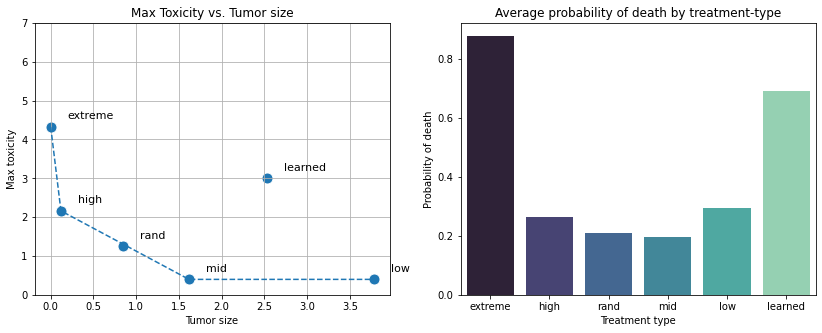


Policy Iteration: 8 - Evaluation results:
                         - Avg. ending tumor size : [2.52841899]
                         - Avg. max. toxicity : [3.00003509]
                         - Avg. prob. of death : [0.69187584]


Evaluation 200 patient generation seed is: 82



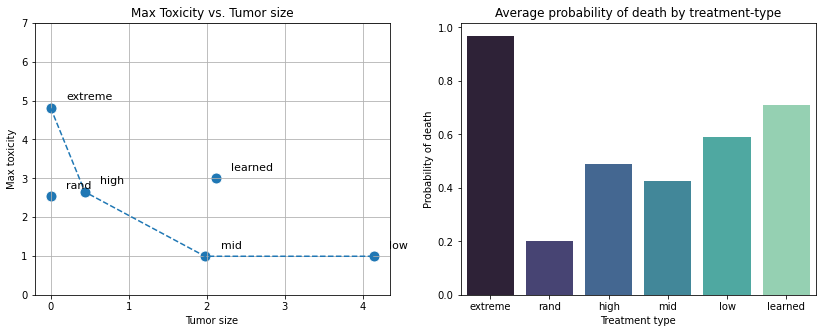


Policy Iteration: 9 - Evaluation results:
                         - Avg. ending tumor size : [2.11259383]
                         - Avg. max. toxicity : [2.99735631]
                         - Avg. prob. of death : [0.71077694]


Evaluation 200 patient generation seed is: 33



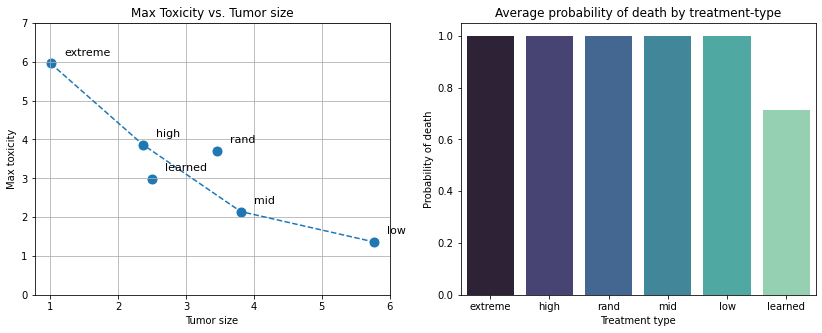


Evaluations: 100%|██████████| 1/1 [1:10:39<00:00, 4239.54s/it]
Policy Iteration: 10 - Evaluation results:
                         - Avg. ending tumor size : [2.49298076]
                         - Avg. max. toxicity : [2.99469555]
                         - Avg. prob. of death : [0.71258006]




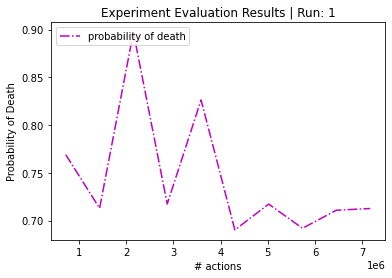

In [12]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size          = sample_size
                                                #, init_state_path       = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions      = configs['Actions'][0]
                                                , max_n_rollouts = rollout_max
                                                , sig_lvl        = sig_lvl

                                                , max_policy_iter_per_run = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config         = 1 # Number of experiments per one parameter config

                                                , eval_runs_per_state     = 1 # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show SR vs. action no. plot of exp. run
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

In [59]:
# # Save the evaluation results
# results_dfs = []
# for result in agg_results:
#     results_dfs.append(pd.DataFrame(result))

# results_df = pd.concat(results_dfs)

# results_df.to_excel(f"eval_results/{ALGO_NAME}_experiment_results_para_config_{configs['CONFIG_NO']}.xlsx", index=False)